# Exploratory Data Analysis

[EDA START](#EDA)

[Key Figures here](#Reds-per-game-played-by-skin-tone)

This dataset is taken from a fantastic paper that looks to see how analytical choices made by different data science teams on the same dataset in an attempt to answer the same research question affect the final outcome.

[Many analysts, one dataset: Making transparent how variations in analytical choices affect results](https://osf.io/gvm2z/)

The data can be found [here](https://osf.io/47tnc/).



# The Task

Take the dataframe `dfd` above and do an Exploratory Data Analysis on the dataset. Keeping in mind the question is the following: **Are soccer referees more likely to give red cards to dark skin toned players than light skin toned players?**

Please work on your own -- and submit a pull-request when you have completed it. We are interested in how the Data Scientists approach EDA and will compile the results into a larger document.

No need to be elaborate w/ explanation; bullet-points are fine.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# %load_ext autoreload
# the "1" means: always reload modules marked with "%aimport"
# %autoreload 1

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
# import mplsvds
import mpld3
import numpy as np
import pandas as pd
import os, sys
# from tqdm import tqdm
import warnings

sns.set_context("notebook", font_scale=1.3)

In [2]:
d = pd.read_csv('../data/CrowdstormingDataJuly1st.csv')

def gen_features(df):
#     all_reds = df['yellowReds']+df['redCards']
#     all_cards = all_reds + df.yellowCards
    return df.assign(
                avg_skintone=(df['rater1']+df['rater2'])/2,
#                 all_reds=all_reds,
#                 all_cards=all_cards,
#                 frac_all_red=all_reds/all_cards,
#                 frac_red=df.redCards/all_cards
          ).rename(columns={'yellowReds': 'yellowRedCards'})

dfd = d.pipe(gen_features)

In [2]:
# # The code from this cell comes from: https://osf.io/w7tds/

# import pandas as pd #for dealing with csv import
# import os # for joining paths and filenames sensibly

# # print "loading datafiles"
# # nb new datase
# filename = os.path.join('../data/redcard/','CrowdstormingDataJuly1st.csv') 
# df = pd.read_csv(filename)

# #add new vars
# df['skintone']=(df['rater1']+df['rater2'])/2
# df['allreds']=df['yellowReds']+df['redCards']
# df['allredsStrict']=df['redCards']
# df['refCount']=0

# #add a column which tracks how many games each ref is involved in
# refs=pd.unique(df['refNum'].values.ravel()) #list all unique ref IDs

# #for each ref, count their dyads
# for r in refs:
#     df['refCount'][df['refNum']==r]=len(df[df['refNum']==r])    

# colnames=list(df.columns)

# j = 0
# out = [0 for _ in range(sum(df['games']))]

# for _, row in df.iterrows():
#         n = row['games']
#         c = row['allreds']
#         d = row['allredsStrict']
        
#         #row['games'] = 1        
        
#         for _ in range(n):
#                 row['allreds'] = 1 if (c-_) > 0 else 0
#                 row['allredsStrict'] = 1 if (d-_) > 0 else 0
#                 rowlist=list(row)  #convert from pandas Series to prevent overwriting previous values of out[j]
#                 out[j] = rowlist
#                 j += 1


# pd.DataFrame(out, columns=colnames).to_csv('../data/redcard/crowdstorm_disaggregated.csv', index=False)

## Data Structure

> The dataset is available as a list with 146,028 dyads of players and referees and includes details from players, details from referees and details regarding the interactions of player-referees. A summary of the variables of interest can be seen below. A detailed description of all variables included can be seen in the README file on the project website. -- https://docs.google.com/document/d/1uCF5wmbcL90qvrk_J27fWAvDcDNrO9o_APkicwRkOKc/edit


| Variable Name: | Variable Description: | 
| -- | -- | 
| playerShort | short player ID | 
| player | player name | 
| club | player club | 
| leagueCountry | country of player club (England, Germany, France, and Spain) | 
| height | player height (in cm) | 
| weight | player weight (in kg) | 
| position | player position | 
| games | number of games in the player-referee dyad | 
| goals | number of goals in the player-referee dyad | 
| yellowCards | number of yellow cards player received from the referee | 
| yellowReds | number of yellow-red cards player received from the referee | 
| redCards | number of red cards player received from the referee | 
| photoID | ID of player photo (if available) | 
| rater1 | skin rating of photo by rater 1 | 
| rater2 | skin rating of photo by rater 1 | 
| refNum | unique referee ID number (referee name removed for anonymizing purposes) | 
| refCountry | unique referee country ID number | 
| meanIAT | mean implicit bias score (using the race IAT) for referee country | 
| nIAT | sample size for race IAT in that particular country | 
| seIAT | standard error for mean estimate of race IAT   | 
| meanExp | mean explicit bias score (using a racial thermometer task) for referee country | 
| nExp | sample size for explicit bias in that particular country | 
| seExp |  standard error for mean estimate of explicit bias measure | 

In [80]:
dfd.shape

(146028, 30)

In [184]:
dfd.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowRedCards,redCards,...,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,avg_skintone
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,...,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000,124621.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,...,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994,0.283559
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,...,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723,0.288517
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001,0.000000
25%,177.000000,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,641.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225,0.000000
50%,182.000000,76.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.250000,1604.000000,21.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586,0.250000
75%,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.500000,2345.000000,44.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002,0.375000
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,...,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660,1.000000


## EDA

Dataset
* From one season (2012-2013)
* 1st division males
* England, France, Germany, Spain

How do we operationalize the question of referees giving more red cards to dark skinned players?
* Counterfactual: if the player were lighter, a ref is more likely to have given a yellow or no card **for the same offense under the same conditions**
* Regression: accounting for confounding, darker players have positive coefficient on regression against proportion red/total card

Potential issues
* How to combine rater1 and rater2? Average them? What if they disagree? Throw it out?
* Is data imbalanced, i.e. red cards are very rare?
* Is data biased, i.e. players have different amounts of play time?
* How do I know I've accounted for all forms of confounding?

**First, is there systematic discrimination across all refs?**

Exploration/hypotheses:
* Distribution of games played
* red cards vs games played
* **Reds per game played vs total cards per game played by skin color**
* **Distribution of # red, # yellow, total cards, and fraction red per game played for all players by avg skin color**
* How many refs did players encounter?
* Do some clubs play more aggresively and get carded more? Or are more reserved and get less?
* Does carding vary by leagueCountry?
* Do high scorers get more slack (fewer cards) for the same position?
* Are there some referees that give more red/yellow cards than others?
* how consistent are raters? Check with Cohen's kappa.
* how do red cards vary by position? e.g. defenders get more?
* Do players with more games get more cards, and is there difference across skin color?
* indication of bias depending on refCountry?

Observations so far
* Mostly white players in these leagues. Makes it more difficult to see discrimination.

/Users/christian/miniconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


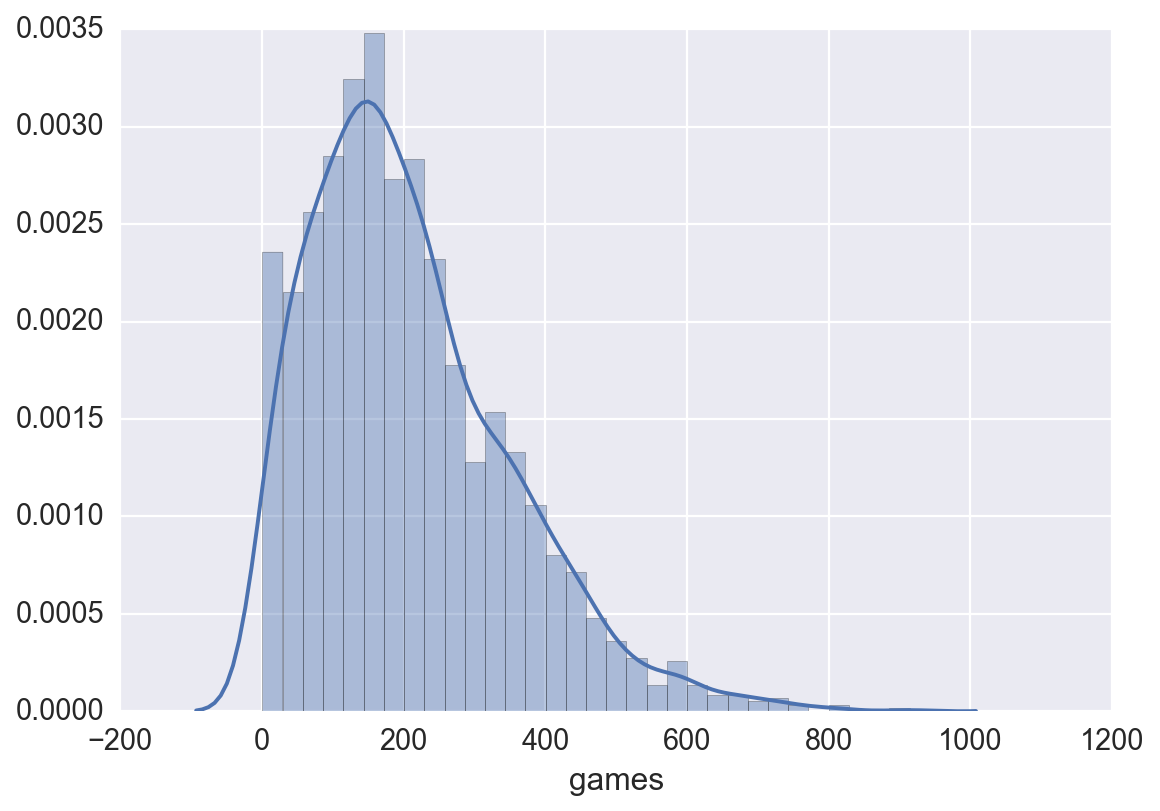

In [4]:
games = dfd.groupby('playerShort').games.sum()
sns.distplot(games)

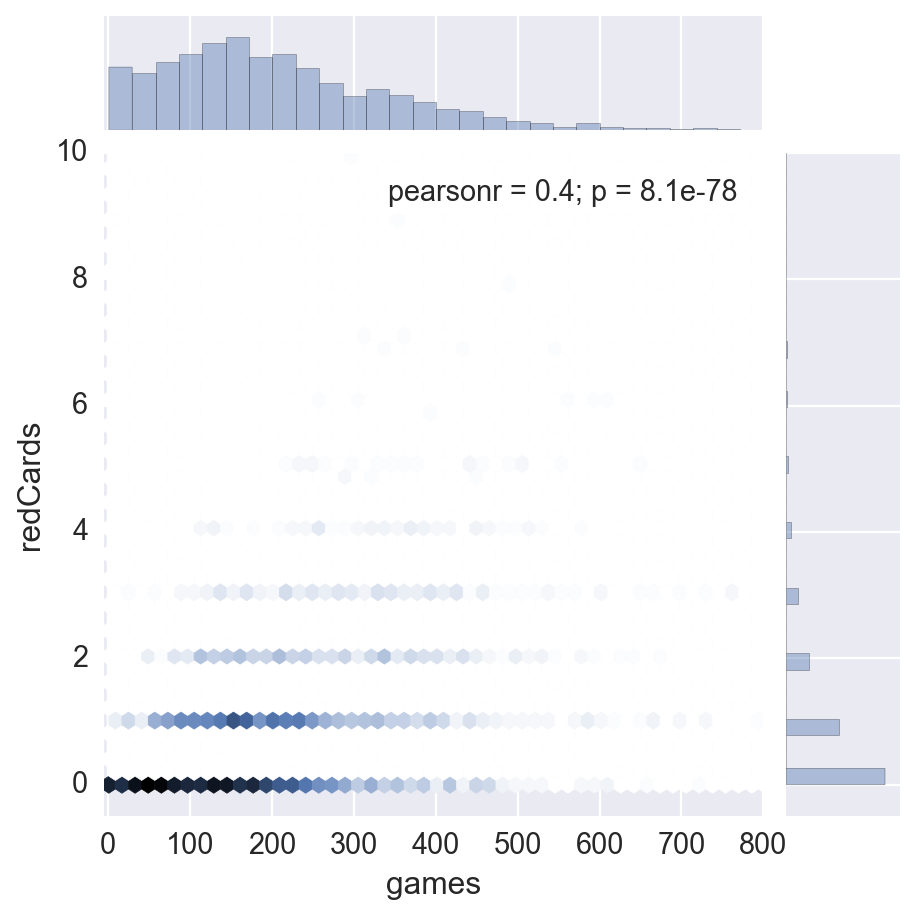

In [69]:
games_red = dfd.groupby('playerShort').sum()[['games','redCards']]
sns.jointplot('games', 'redCards', data=games_red, kind='hexmap', xlim=(-5,800), ylim=(-.5,10))

This is incorrect, because I'm grouping over skin tone and not first aggregating up to players, so this is averaging over player-referee dyads. There are many more of those than players, so will drive the average down...

TODO: Still, why is 0.625 much lower than the rest? ANSWER: Fewer in that bin.

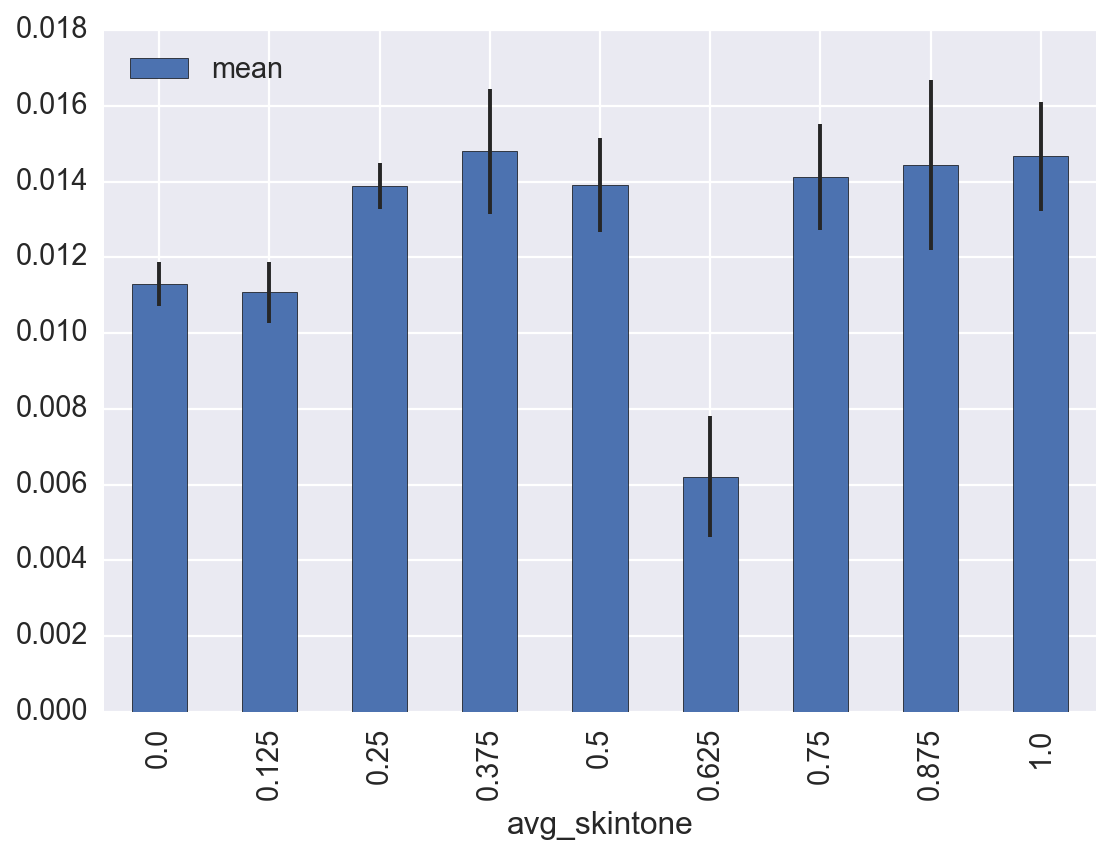

In [6]:
red_skin = dfd.groupby('avg_skintone').redCards.agg(['mean','sem','count'])
red_skin.plot.bar(y='mean', yerr='sem')

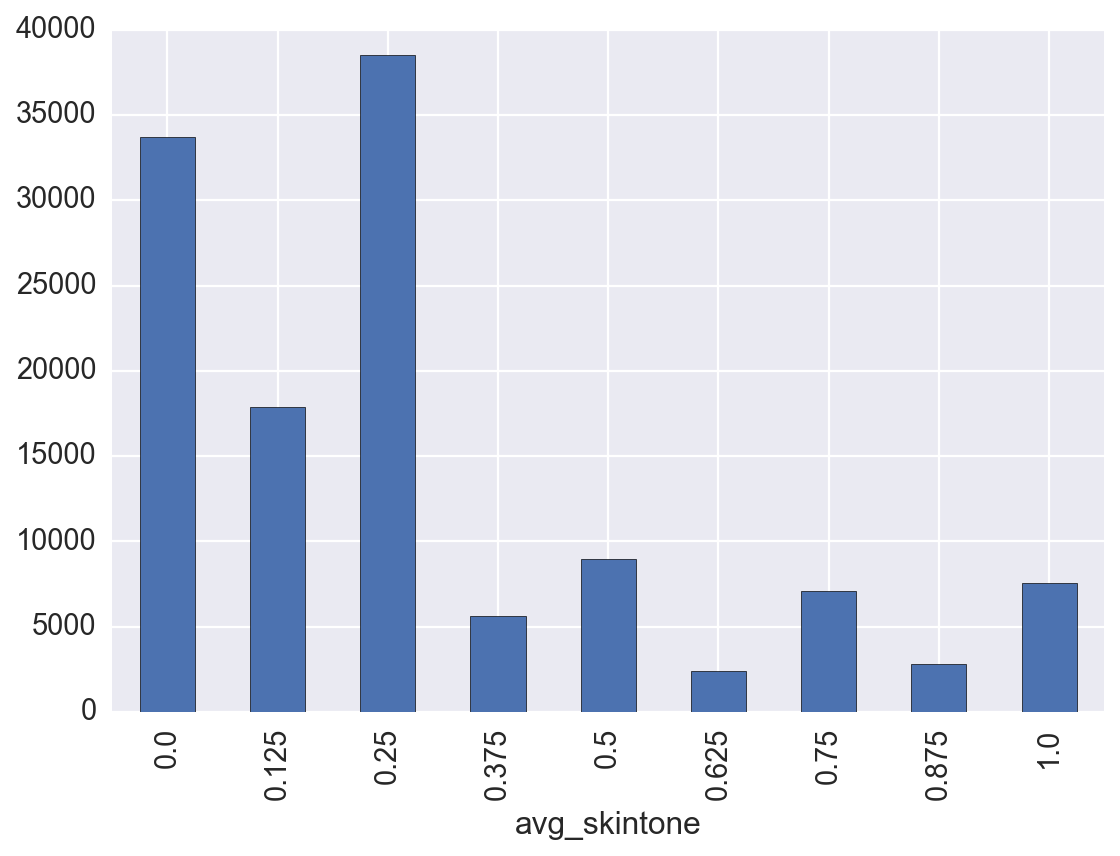

In [7]:
red_skin['count'].plot.bar()

### Distribution of cards

In [10]:
# Most number of refs encountered
dfd.groupby(['playerShort','refNum']).size().argmax()

('aaron-hughes', 4)

In [11]:
def add_totals(df):
    total = df.filter(like='Cards').sum(1)
    all_red = df.yellowRedCards + df.redCards
    assert (all_red<=total).all()
    df = df.assign(
            total_cards=total,
            all_red=all_red,
            frac_red = df.redCards/total,
            frac_all_red = all_red/total
        )
    assert df.frac_red.dropna().between(0,1).all()
    assert (all_red>=df.redCards).all()
    return df
        
totals = (dfd.groupby('playerShort').agg({
    'yellowCards': 'sum',
    'redCards': 'sum',
    'yellowRedCards': 'sum',
    'games': 'sum',
    'avg_skintone': 'mean'
    })
    .pipe(add_totals)
)
totals.head()

,avg_skintone,redCards,yellowCards,games,yellowRedCards,all_red,frac_all_red,frac_red,total_cards
playerShort,,,,,,,,,
aaron-hughes,0.125,0,19,654,0,0,0.000000,0.000000,19
aaron-hunt,0.125,1,42,336,0,1,0.023256,0.023256,43
aaron-lennon,0.250,0,11,412,0,0,0.000000,0.000000,11
aaron-ramsey,0.000,1,31,260,0,1,0.031250,0.031250,32
abdelhamid-el-kaoutari,0.250,2,8,124,4,6,0.428571,0.142857,14


In [12]:
totals.shape

(2053, 9)

albelda got almost 200 yellow cards in one season!!

In [13]:
totals.describe()

,avg_skintone,redCards,yellowCards,games,yellowRedCards,all_red,frac_all_red,frac_red,total_cards
count,1585.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,1987.000000,1987.000000,2053.000000
mean,0.289511,0.893327,27.410619,207.779834,0.809547,1.702874,0.060798,0.037183,29.113492
std,0.290899,1.257267,24.076074,141.604438,1.293358,2.121637,0.088147,0.081542,25.583736
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,10.000000,103.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,0.250000,0.000000,21.000000,180.000000,0.000000,1.000000,0.045455,0.011765,23.000000
75%,0.375000,1.000000,39.000000,286.000000,1.000000,2.000000,0.083333,0.047619,41.000000
max,1.000000,13.000000,197.000000,914.000000,12.000000,19.000000,1.000000,1.000000,206.000000


In [14]:
totals.yellowCards.argmax(),totals.yellowRedCards.argmax(),totals.redCards.argmax()

('albelda', 'sergio-ramos', 'cyril-jeunechamp')

/Users/christian/miniconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


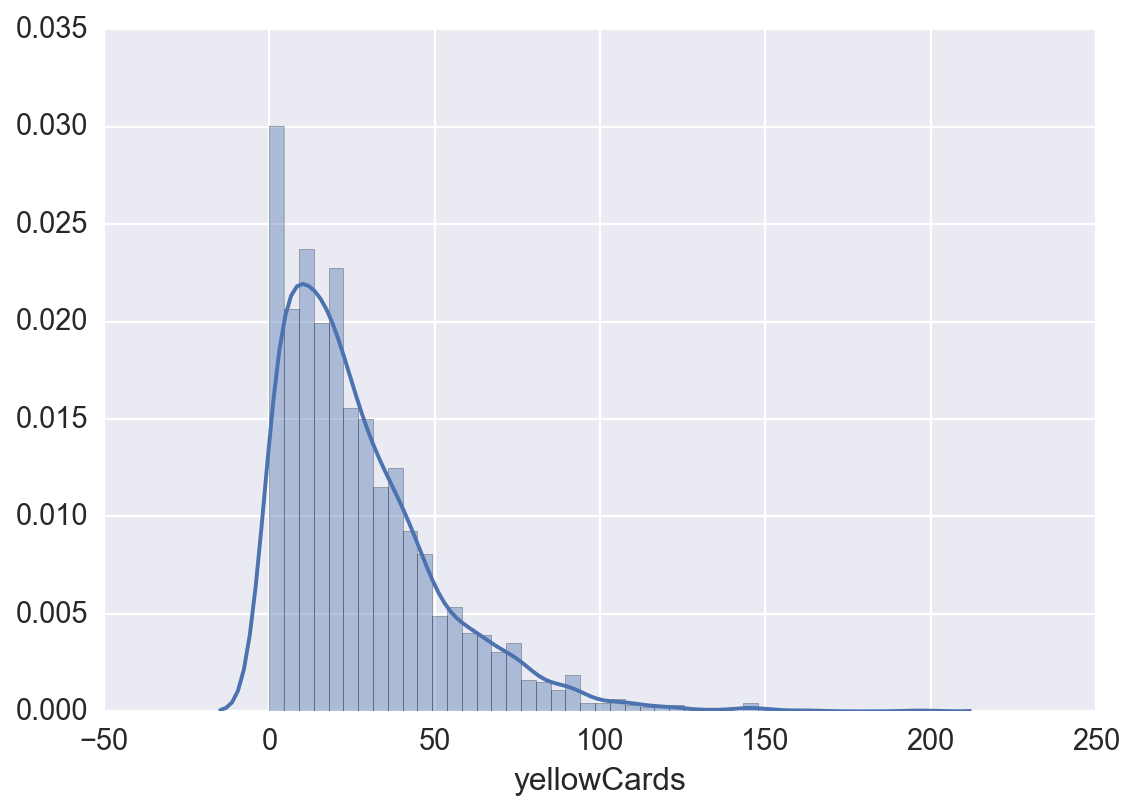

In [15]:
sns.distplot(totals.yellowCards)

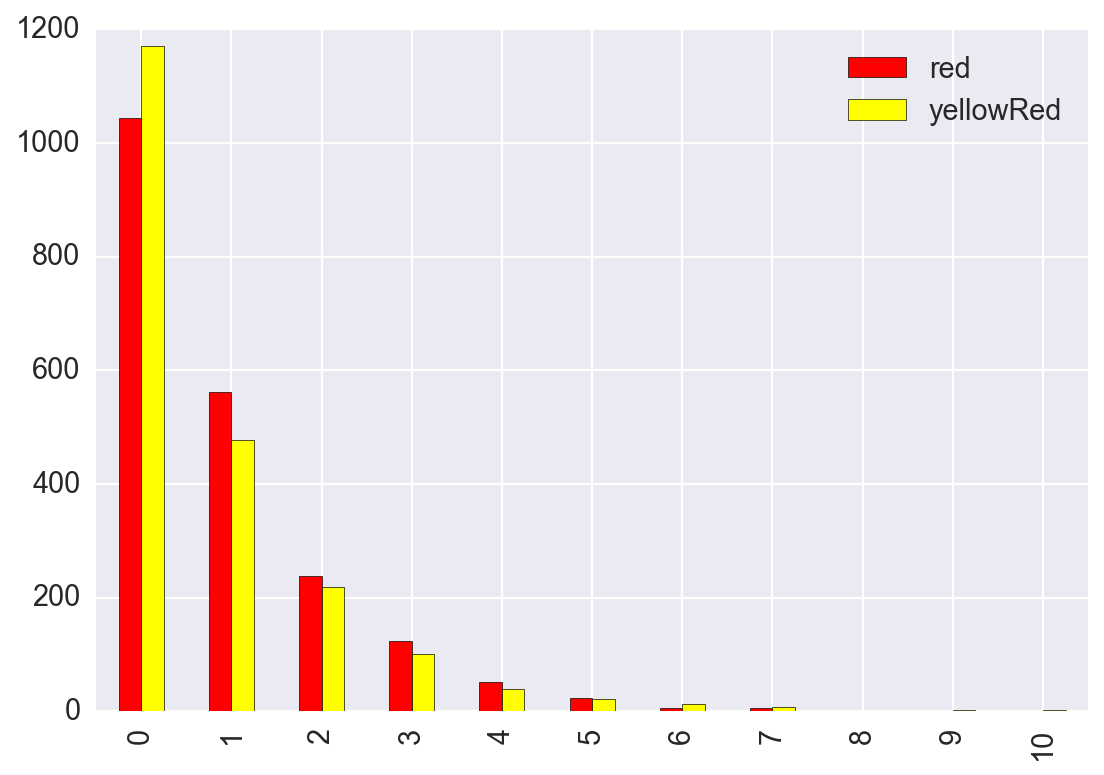

In [65]:
# These colors suck; upgrade to Matplotlib 2
r,y = totals[['redCards','yellowRedCards']].apply(np.histogram, bins=range(12))
pd.DataFrame({'red': r[0], 'yellowRed': y[0]}, index=r[1][:-1]).plot.bar(color=['red','yellow'])

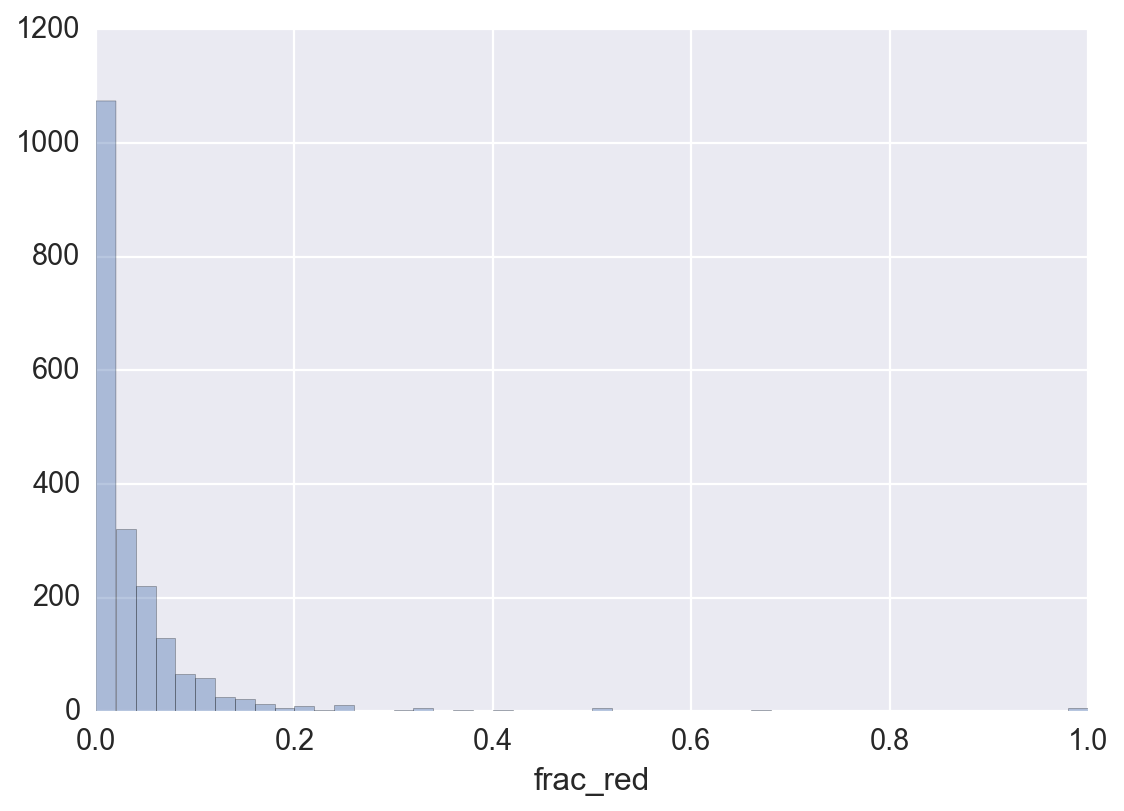

In [37]:
sns.distplot(totals.frac_red.dropna(), kde=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129f34780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12b85b668>]], dtype=object)

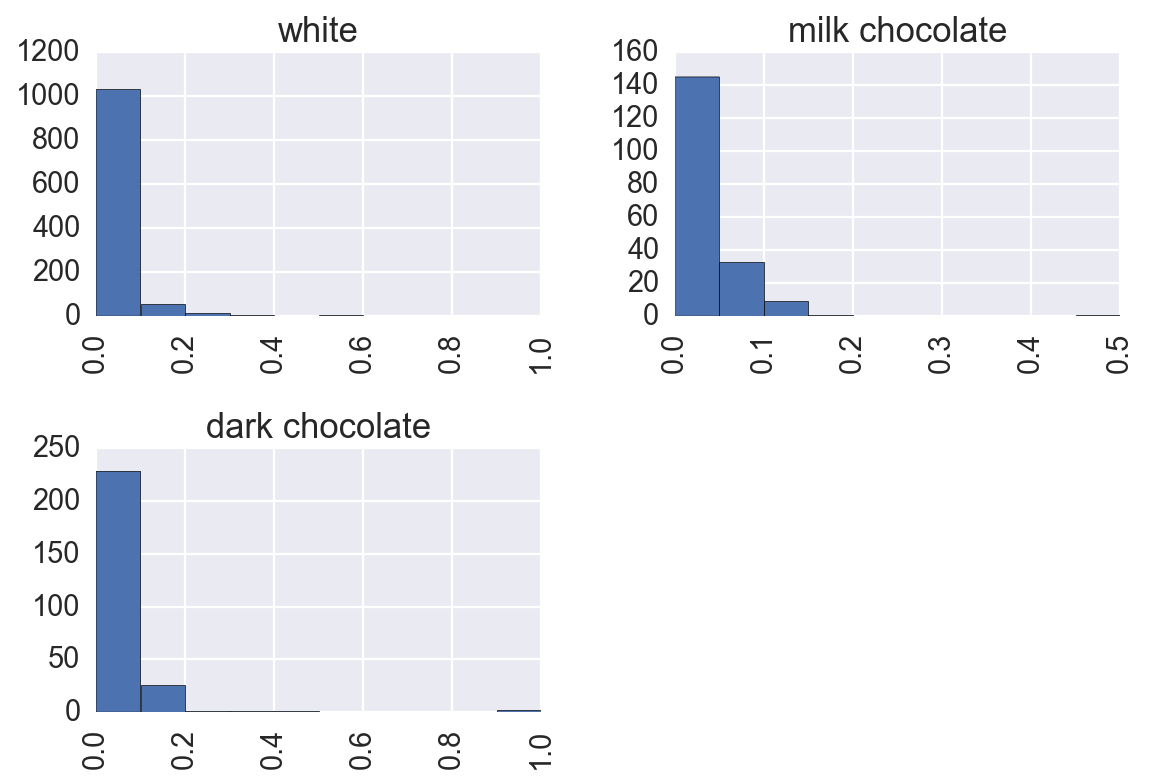

In [106]:
totals.hist('frac_red', by='skincolor')

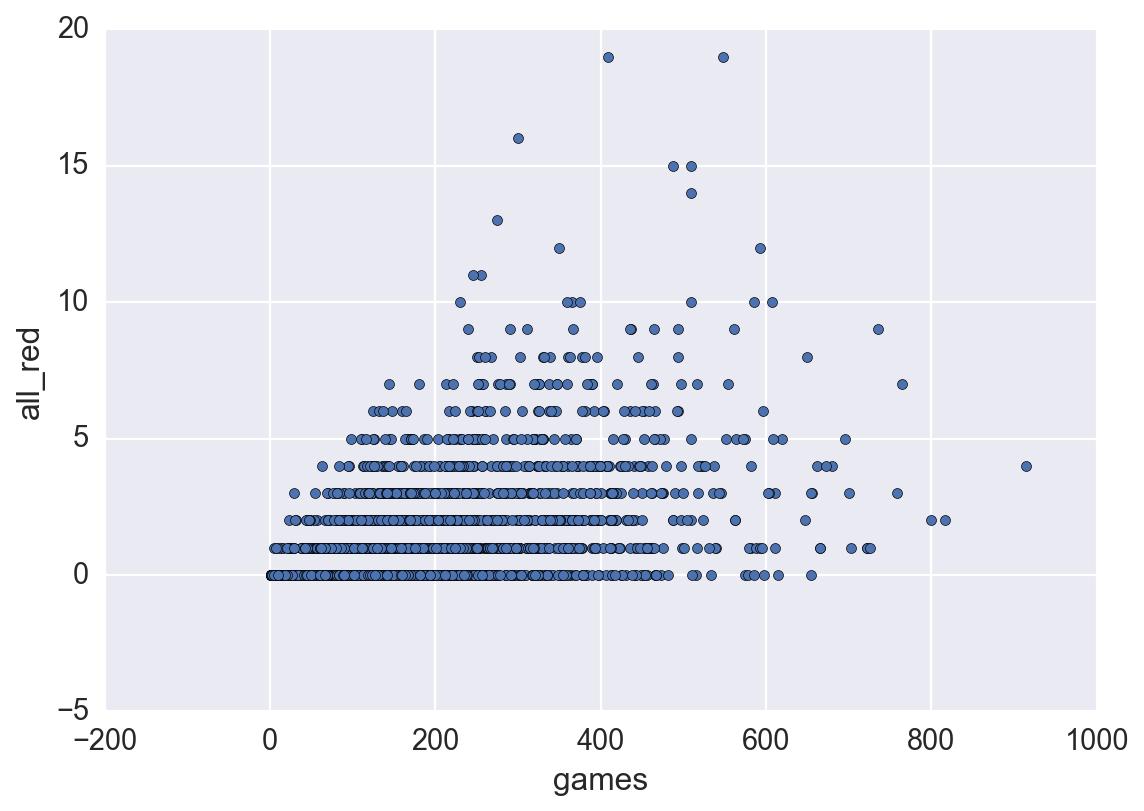

In [67]:
totals.plot.scatter('games', 'all_red')

### Reds per game played by skin tone

#### Results

1. Identified problem with preprocessing and fixed. EDA success!

2. I don't see convincing discrimination at a systemic level yet. Darker skinned palyers may get tend to get more reds when they get more cards, but the relationships are noisy.

Needs iteration!

/Users/christian/miniconda3/lib/python3.5/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


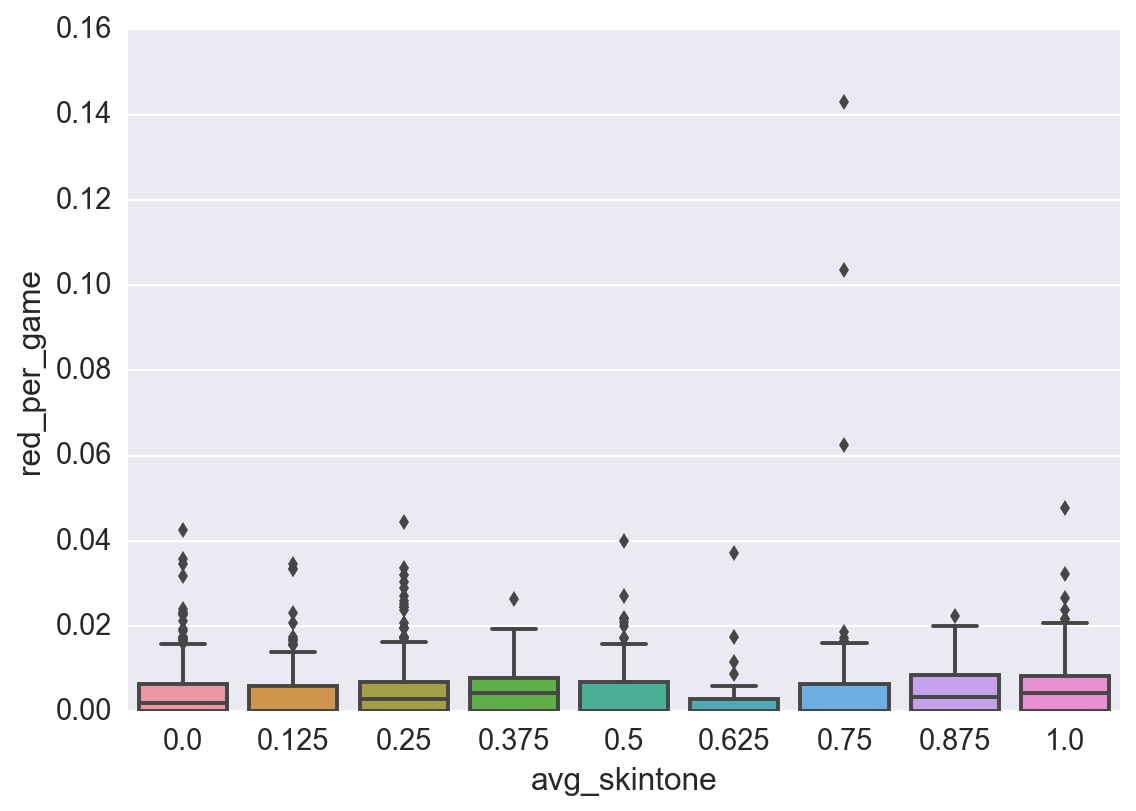

In [19]:
totals['red_per_game'] = totals.redCards/totals.games
sns.boxplot(x='avg_skintone', y='red_per_game', data=totals)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c6d15c0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12228ac18>], dtype=object)

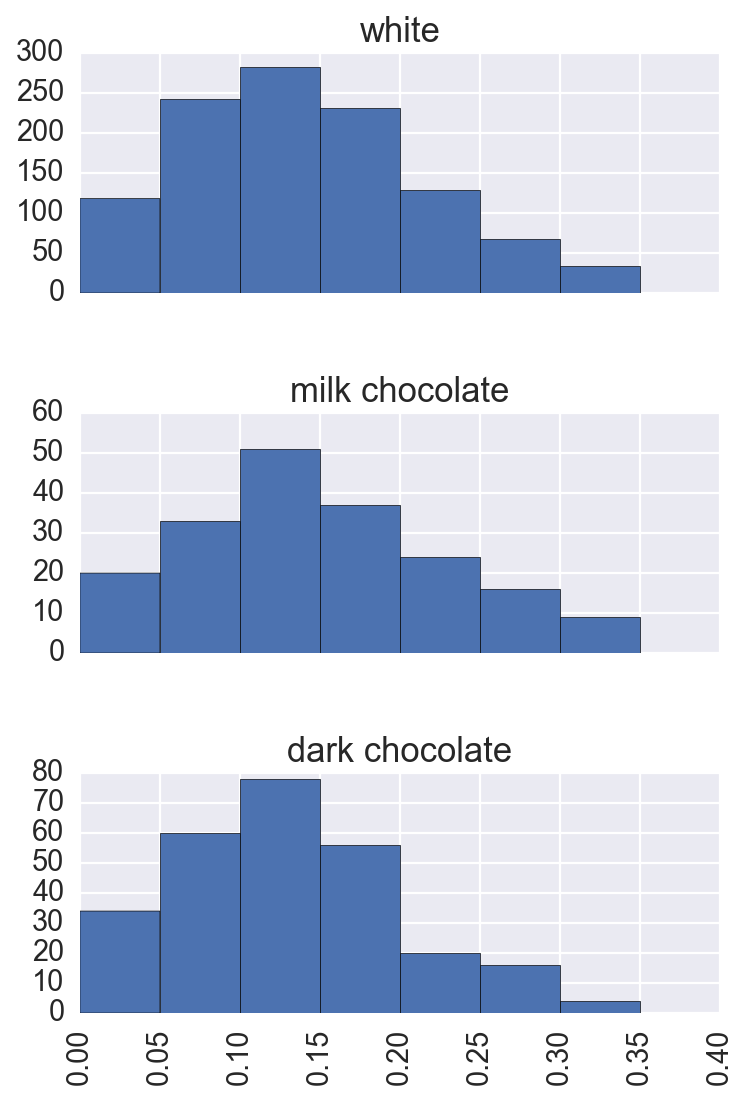

In [85]:
totals.hist('total_per_game', bins=np.arange(0, .4, .05), 
            by=totals.skincolor, layout=(3,1), 
            figsize=(5,8), sharex=True)

/Users/christian/miniconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


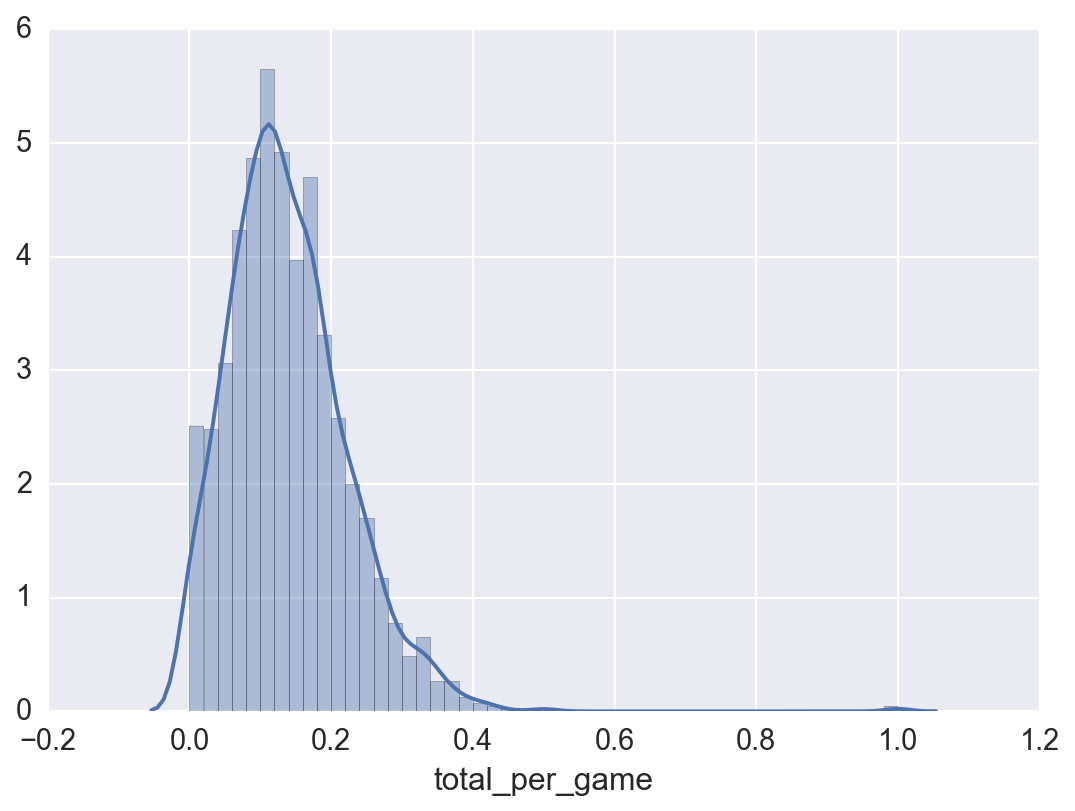

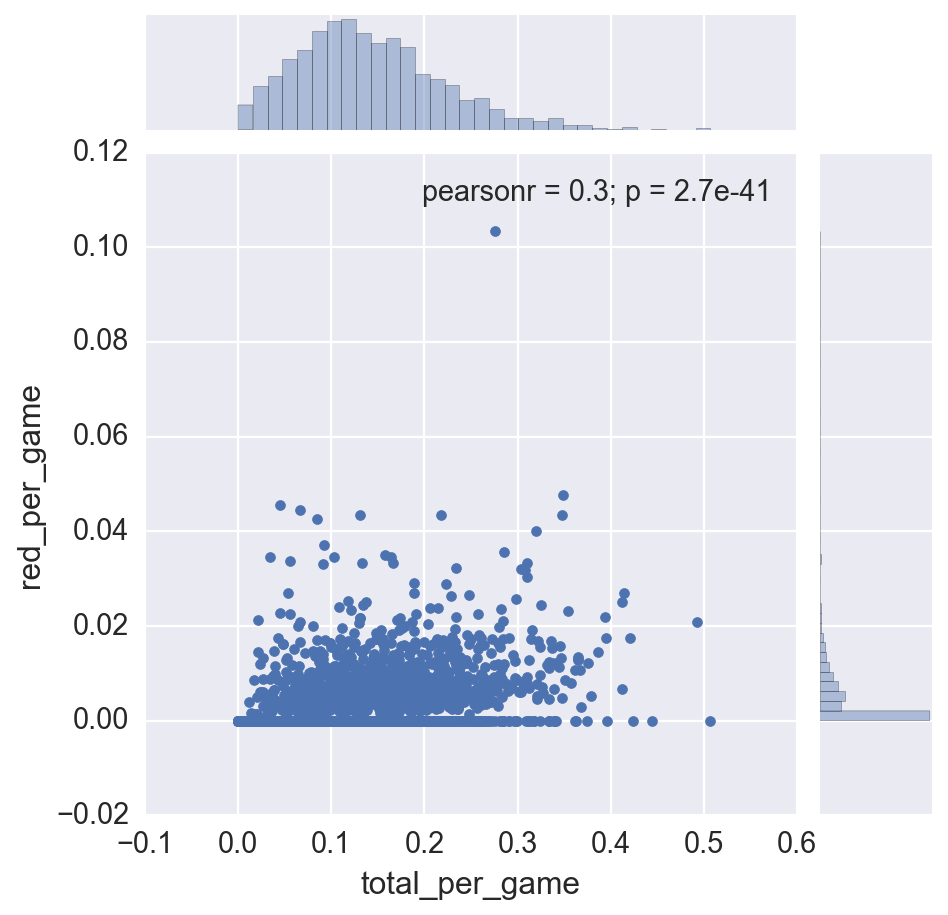

In [20]:
totals['total_per_game'] = totals.total_cards / totals.games
sns.distplot(totals.total_per_game)
sns.jointplot('total_per_game', 'red_per_game', data=totals[totals.games>20])

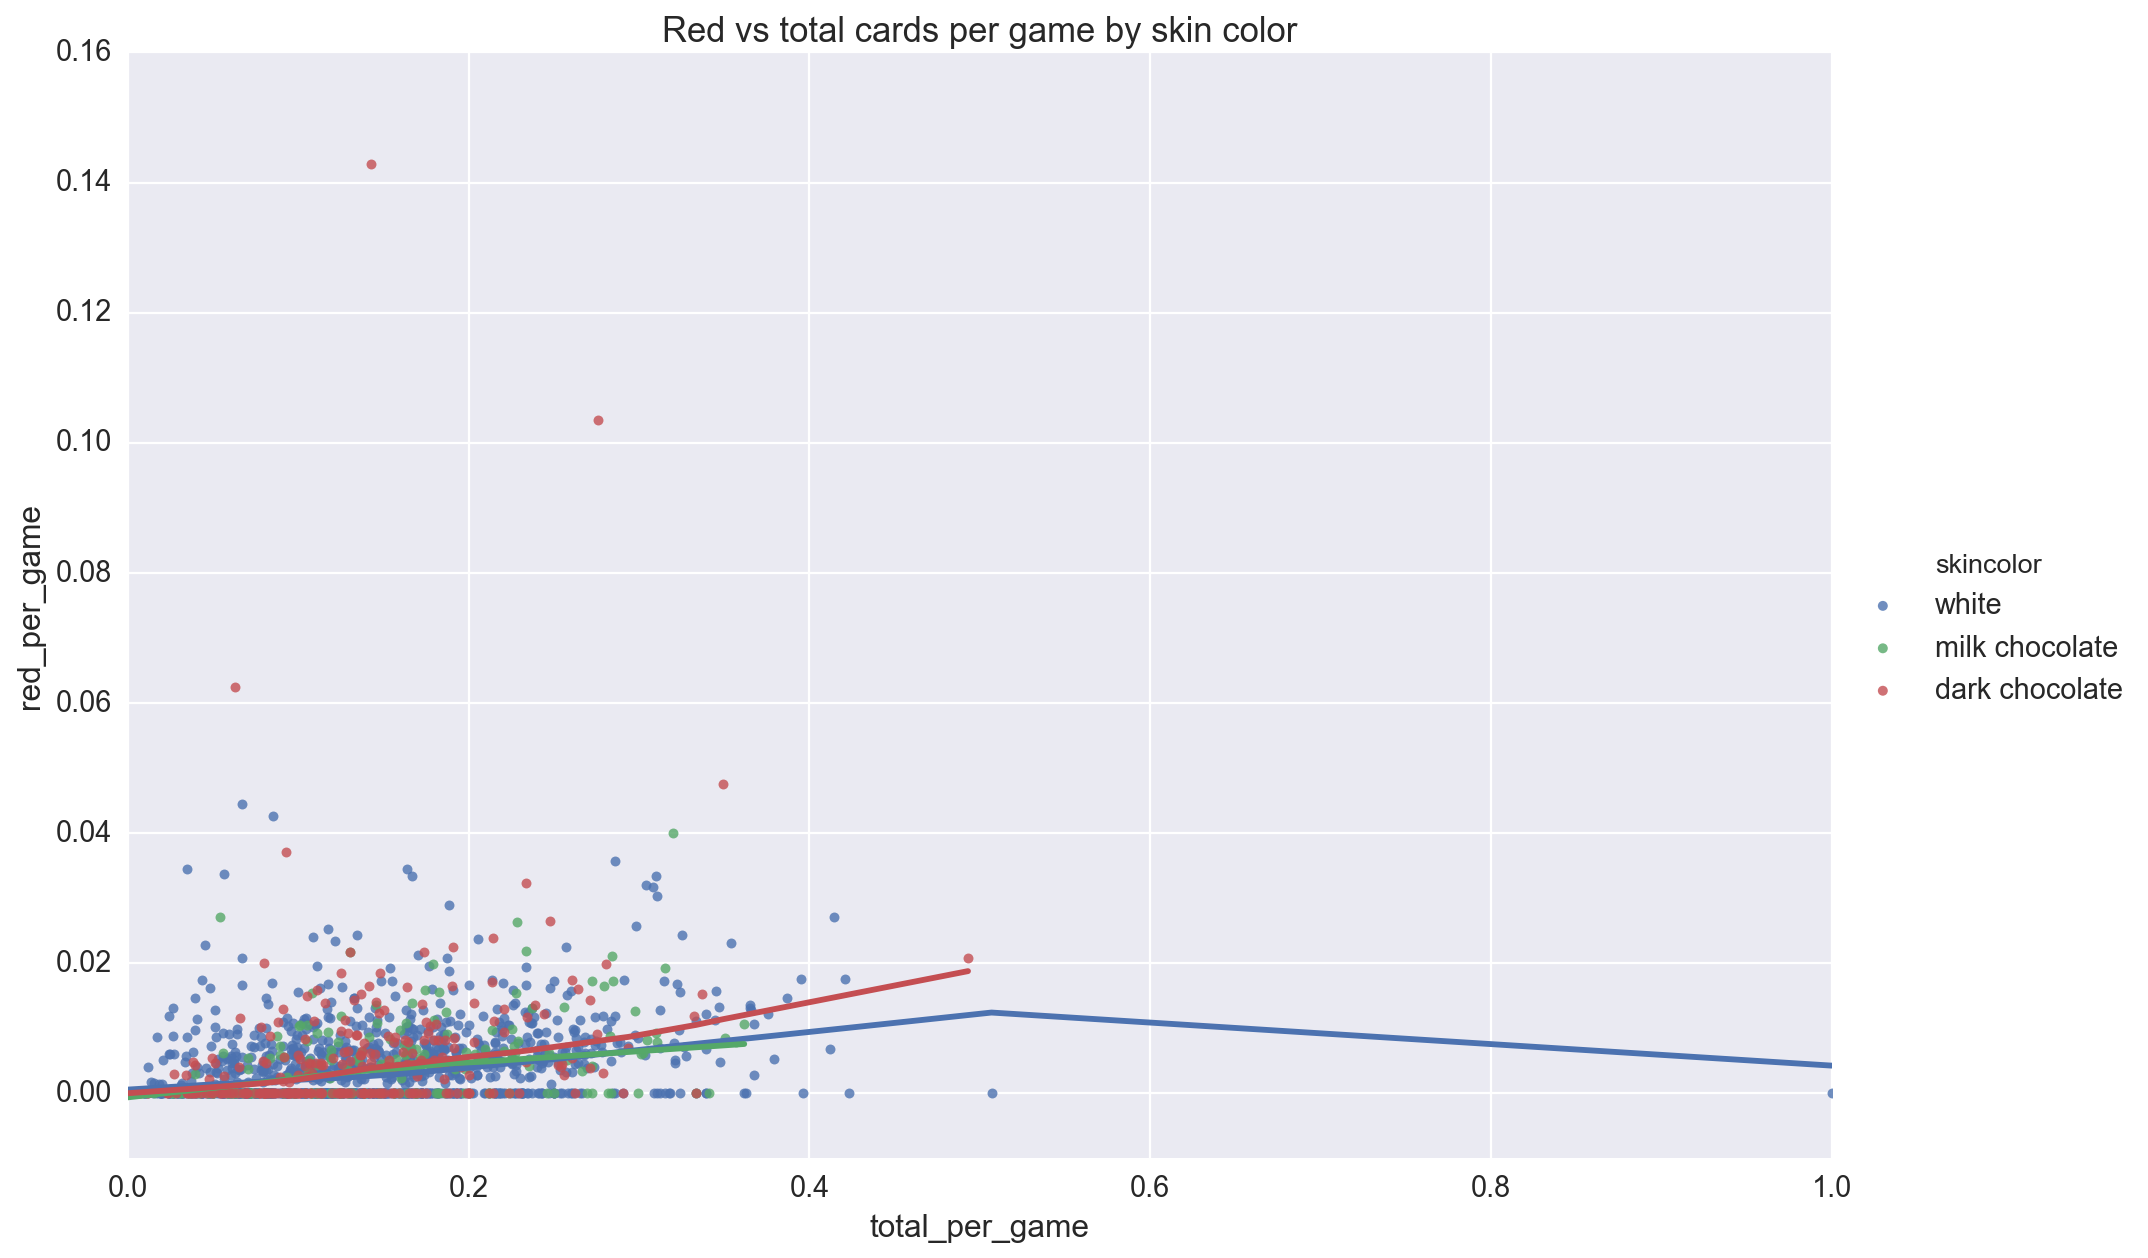

In [71]:
totals['skincolor'] = pd.cut(totals.avg_skintone,[0,.3,.6,1], 
                             labels=['white','milk chocolate','dark chocolate'], 
                                     include_lowest=True)
have_card = totals[totals]
(sns.FacetGrid(totals, hue='skincolor', size=8, aspect=1.5)
 .map(sns.regplot, 'total_per_game', 'red_per_game', lowess=True)
 .add_legend()
 .ax.set(title='Red vs total cards per game by skin color',
         xlim=(0,1), ylim=(-0.01,.16))
);

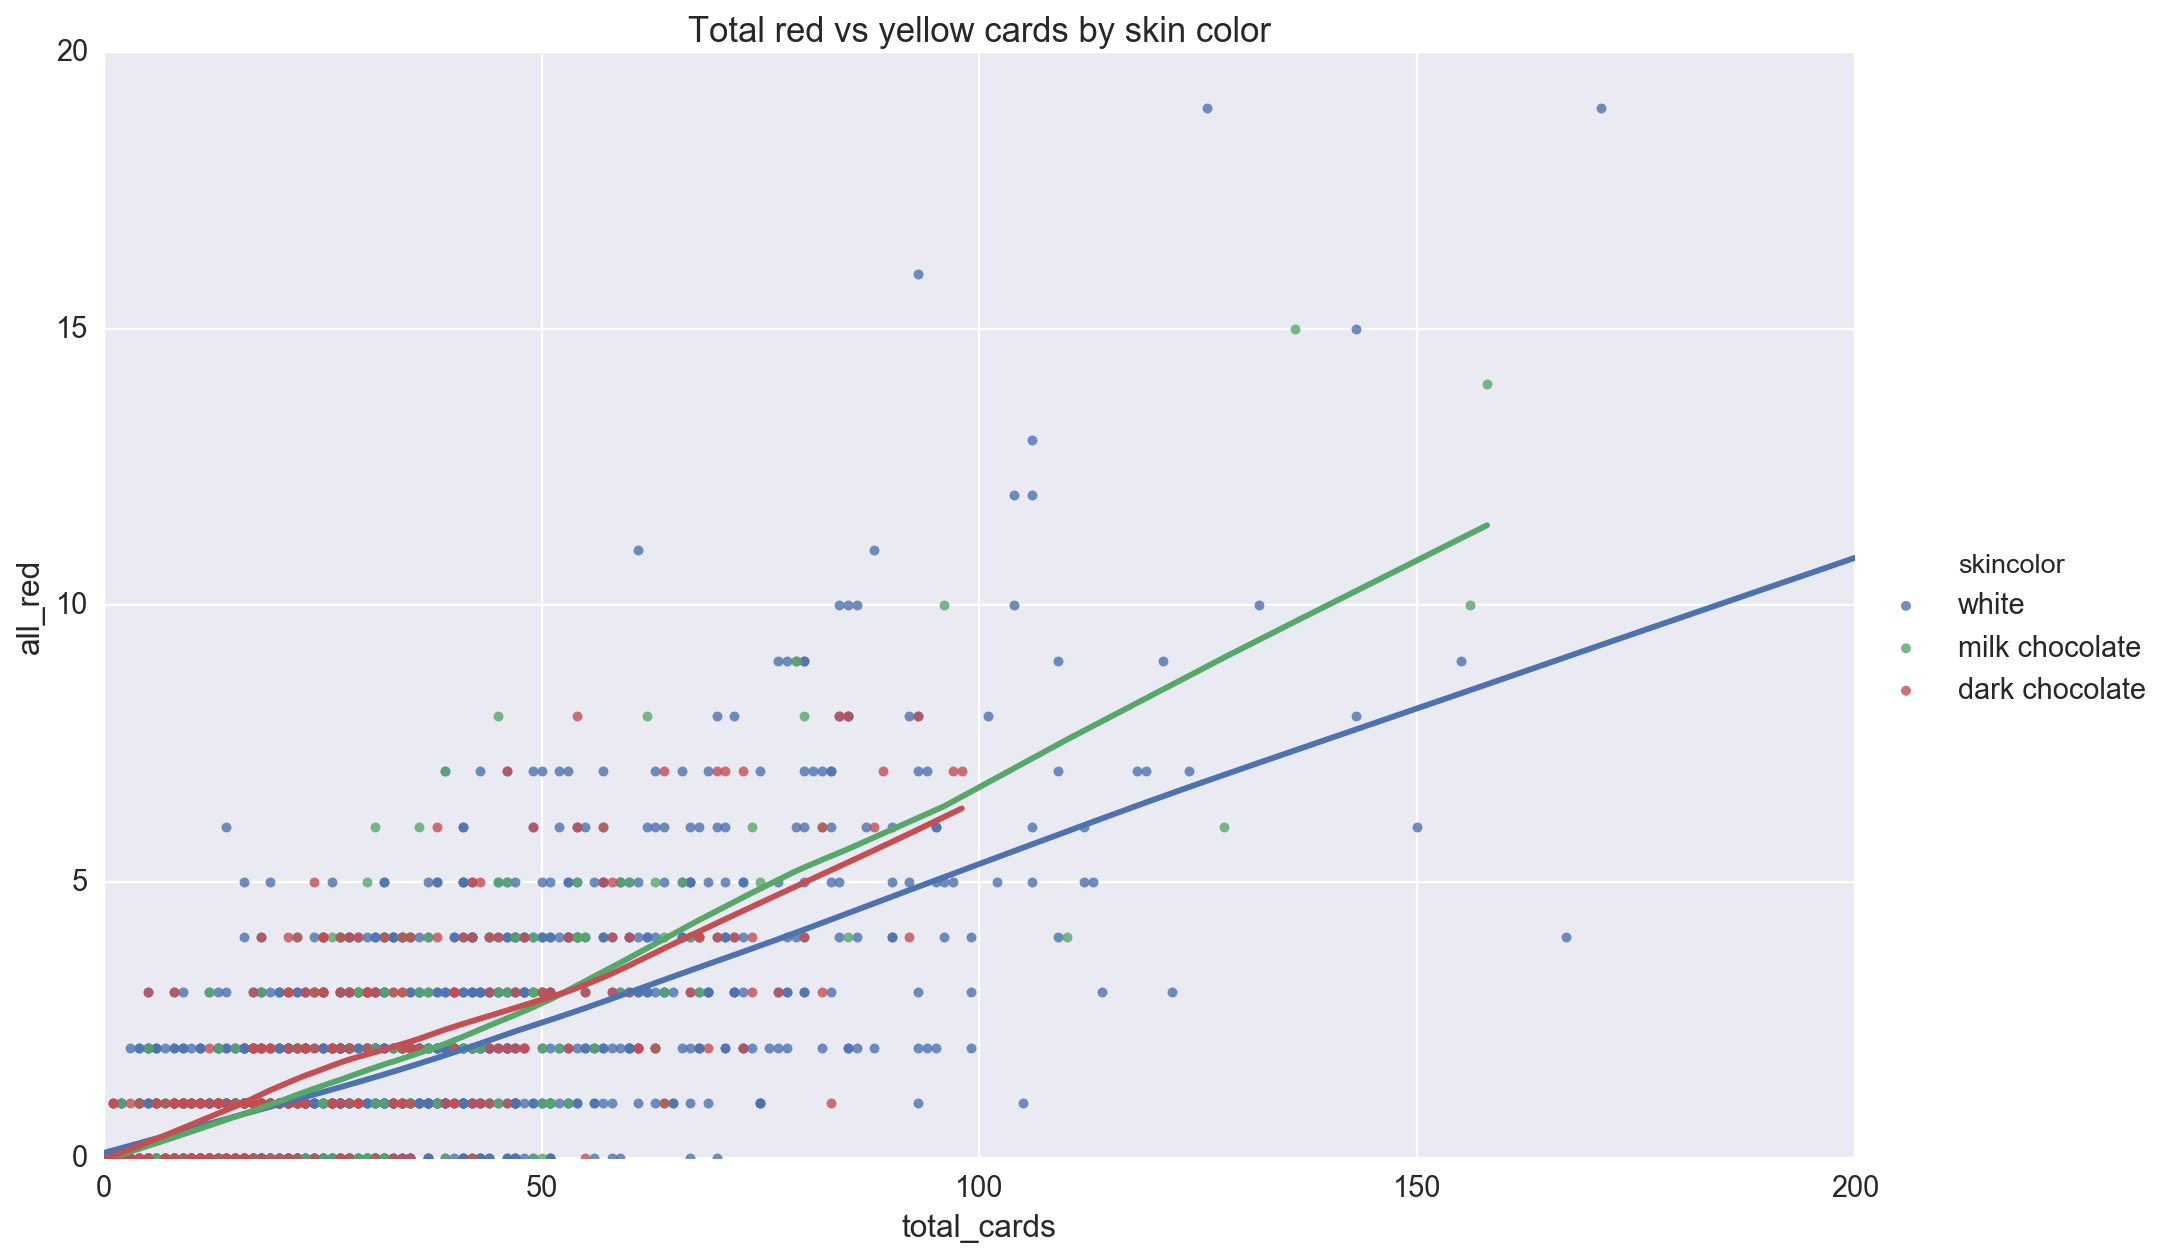

In [97]:
(sns.FacetGrid(totals, hue='skincolor', size=8, aspect=1.5)
 .map(sns.regplot, 'total_cards', 'all_red', lowess=True)
 .add_legend()
 .ax.set(title='Total red vs yellow cards by skin color',
         xlim=(0,200), ylim=(0,20))
);

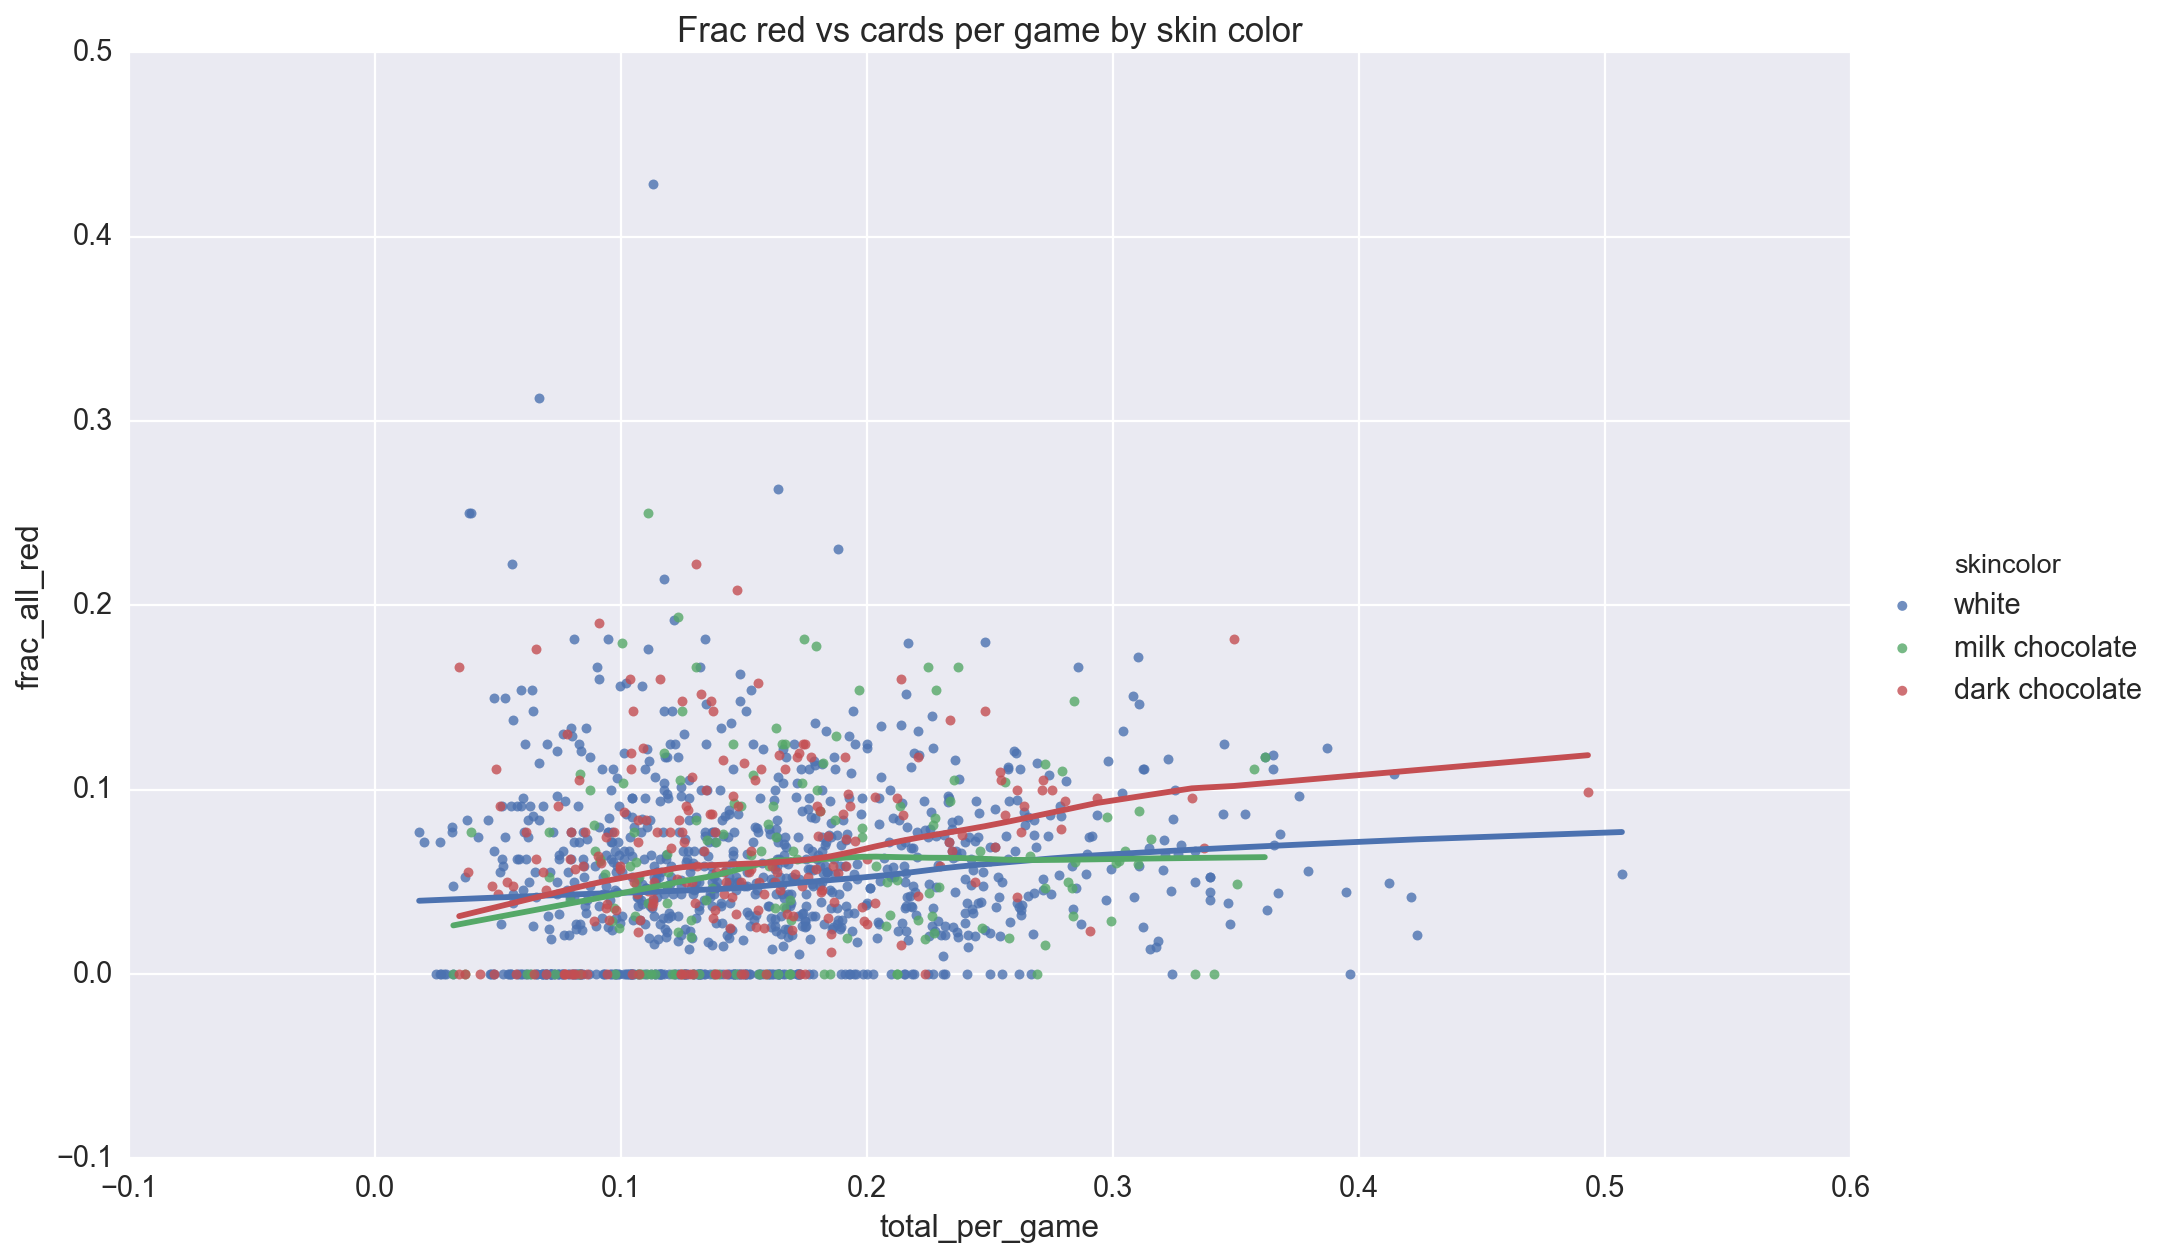

In [107]:
(sns.FacetGrid(totals[totals.total_cards>10], hue='skincolor', size=8, aspect=1.5)
 .map(sns.regplot, 'total_per_game', 'frac_all_red', lowess=True)
 .add_legend()
 .ax.set(title='Frac red vs cards per game by skin color',
#          xlim=(0,200), ylim=(0,20)
        )
);